Zaimportowanie odpowiednich bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Import i zapoznanie się z danymi

In [2]:
df = pd.read_csv('panel_noRNG.csv')

In [3]:
df.head()

,długość dnia,zachmurzenie,kąt paneli,typ panelu,temperatura,wiek,output
0,14,99,29,Polikrytsaliczny,24,12,436
1,14,7,33,Monokrystaliczny,23,24,798
2,8,37,25,Monokrystaliczny,4,30,437
3,12,46,32,Monokrystaliczny,15,8,589
4,14,12,27,Polikrytsaliczny,23,18,668


In [4]:
df.columns

Index(['długość dnia', 'zachmurzenie', 'kąt paneli', 'typ panelu',
       'temperatura', 'wiek', 'output'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['długość_dnia', 'zachmurzenie', 'kąt_paneli', 'typ_panelu',
       'temperatura', 'wiek', 'output'],
      dtype='object')

In [6]:
df.dtypes

długość_dnia     int64
zachmurzenie     int64
kąt_paneli       int64
typ_panelu      object
temperatura      int64
wiek             int64
output           int64
dtype: object

In [7]:
df.typ_panelu.unique()

array(['Polikrytsaliczny', 'Monokrystaliczny'], dtype=object)

In [8]:
feature_columns = ['typ_panelu']
numerical_columns = [x for x in df.columns if x not in feature_columns]
numerical_columns, feature_columns

(['długość_dnia',
  'zachmurzenie',
  'kąt_paneli',
  'temperatura',
  'wiek',
  'output'],
 ['typ_panelu'])

79     265
57     271
25     278
154    281
159    289
      ... 
1      798
184    803
125    813
48     830
52     916
Name: output, Length: 200, dtype: int64


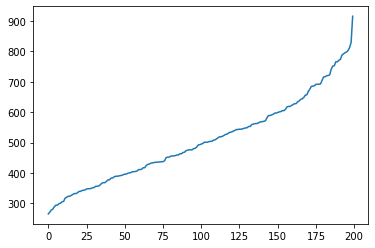

In [9]:
sorted = df.output.sort_values()
print(sorted)
plt.plot(sorted.values)

In [34]:
print(sorted[-10:])

139    771
80     774
145    788
81     792
153    796
1      798
184    803
125    813
48     830
52     916
Name: output, dtype: int64


C:\Users\Dmoch\AppData\Local\Temp\ipykernel_8052\1748926105.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(sorted[-10:])


In [10]:
sorted.describe().round(2)

count    200.00
mean     505.57
std      139.25
min      265.00
25%      395.50
50%      494.00
75%      597.50
max      916.00
Name: output, dtype: float64

In [11]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=1)
df_full_train.shape, df_test.shape

((160, 7), (40, 7))

In [12]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25,random_state=1)
df_train.shape, df_val.shape


((120, 7), (40, 7))

In [13]:
df_test.reset_index(inplace=True)
df_full_train.reset_index(inplace=True)
df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)


In [14]:
df_val.head()

,index,długość_dnia,zachmurzenie,kąt_paneli,typ_panelu,temperatura,wiek,output
0,66,11,12,31,Polikrytsaliczny,13,16,617
1,81,14,0,30,Monokrystaliczny,22,26,792
2,33,17,33,25,Polikrytsaliczny,27,27,742
3,83,8,62,30,Monokrystaliczny,4,18,405
4,92,8,33,32,Monokrystaliczny,4,10,435


In [15]:
y_train = df_train.output.values
y_val = df_val.output.values
y_test = df_test.output.values
y_full_train = df_full_train.output.values
del df_train['output']
del df_val['output']
del df_test['output']
del df_full_train['output']

In [16]:
# X_train = df_train.values
# X_val = df_val.values
# X_test = df_test.values
# X_train[:5], X_val[:5], X_test[:5], y_train[:5], y_val[:5], y_test[:5]

In [17]:
train_dictionaries = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train= dv.fit_transform(train_dictionaries)

In [18]:
dv.get_feature_names()

c:\Users\Dmoch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['długość_dnia',
 'index',
 'kąt_paneli',
 'temperatura',
 'typ_panelu=Monokrystaliczny',
 'typ_panelu=Polikrytsaliczny',
 'wiek',
 'zachmurzenie']

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
validate_dictionaries = df_val.to_dict(orient = 'records')
X_validate = dv.transform(validate_dictionaries)

In [22]:
y_prediction = model.predict(X_validate)
y_prediction

array([578.24720457, 736.96502383, 712.46694964, 370.68340608,
       451.46300066, 421.96485674, 643.49540801, 389.99734089,
       263.2208955 , 429.96945723, 388.62105855, 722.65428746,
       436.64841467, 614.86340986, 627.64393691, 311.46825213,
       354.07955883, 687.23623404, 552.02530166, 590.07821573,
       225.08027683, 455.13138371, 592.45432794, 738.58659286,
       375.43922307, 622.70933776, 452.71539497, 647.9422798 ,
       681.62259903, 521.45044259, 457.83802416, 488.49030897,
       389.87673358, 370.71059328, 553.51618952, 684.95847678,
       282.40197046, 641.6935435 , 695.2985026 , 382.14186992])

In [23]:
MSE = mean_squared_error(y_val, y_prediction)
RMSE = MSE**(1/2)
round(RMSE,3)

38.579

In [24]:
full_train_dictionaries = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_full_train= dv.fit_transform(full_train_dictionaries)


In [25]:
full_model = LinearRegression().fit(X_full_train,y_full_train)

In [26]:
test_dictionaries = df_test.to_dict(orient = 'records')
X_test = dv.transform(test_dictionaries)

In [27]:
y_test_prediction = full_model.predict(X_test)

In [28]:
MSE_test = mean_squared_error(y_test,y_test_prediction)
RMSE_test = MSE_test**(1/2)
round(RMSE_test,3)

32.014

In [43]:
improvement = round(((RMSE-RMSE_test)/RMSE)*100,6)
improvement

17.017354

In [30]:
avg_output = np.average(df.output.values)
avg_output

505.57

In [46]:
round((RMSE/avg_output)*100,3)

7.631

In [66]:
example = [X_test[1]]
example

[array([ 8., 40., 33.,  5.,  1.,  0., 17.,  6.])]

In [67]:
full_model.predict(example)

array([526.65763693])

In [65]:
y = y_test[1]
y

538